# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    for i,n in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n, activation="relu", name="H_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation="relu", name="H_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [30]:
## 超參數設定
LEARNING_RATE = [0.1,0.01,0.001,0.0001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
opt_name = ["SGD","RMSprop","Adagrad","Adam"]
def optimizer(lr):
    opt1 = keras.optimizers.SGD(lr=lr, nesterov=True, decay=1e-6,momentum=0.9)
    opt2 = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=1e-6)
    opt3 = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=1e-6)
    opt4 = keras.optimizers.Adam(lr=lr, epsilon=None, decay=1e-6)
    return [opt1,opt2,opt3,opt4]

In [7]:
y_train.shape

(50000, 10)

In [31]:
results = {}
for lr in LEARNING_RATE:
    opt = optimizer(lr)
    for i,j in zip(opt_name,opt):
        #keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with learning rate = %.6f" % (lr))
        print("Experiment with optimizer = %s" % (i))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=j)

        model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=BATCH_SIZE, 
                validation_data=(x_test, y_test), 
                shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-opt-%s-lr-%s" %(i,str(lr))
        print("--------------------END: "+exp_name_tag+"------------------------------------")
        results[exp_name_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}

Experiment with learning rate = 0.100000
Experiment with optimizer = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
H_layer1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
H_layer2 (Dense)             (None, 256)               131328    
_________________________________________________________________
H_layer3 (Dense)             (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/5

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 88us/step - loss: 14.4449 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.4453 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.4462 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8703 - acc: 0.3283 - val_loss: 1.6910 - val_acc: 0.4013
Epoch 2/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6476 - acc: 0.4157 - val_loss: 1.6053 - val_acc: 0.4273
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5614 - acc: 0.4467 - val_loss: 1.5862 - val_acc: 0.4259
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4910 - acc: 0.4706 - val_loss: 1.5819 - val_acc: 0.4315
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4413 - acc: 0.4887 - val_loss: 1.4753 - val_acc: 0.4762
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4012 - acc: 0.5016 - val_loss: 1.5884 - val_acc: 0.4333
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3607 - acc: 0.5171 - val_loss: 1.4949 - val_acc

50000/50000 [==============================] - 5s 91us/step - loss: 14.4464 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 5s 90us/step - loss: 14.4205 - acc: 0.1010 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 5s 97us/step - loss: 14.4444 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 4s 89us/step - loss: 2.0690 - acc: 0.2532 - val_loss: 1.9313 - val_acc: 0.3192
Epoch 2/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8731 - acc: 0.3437 - val_loss: 1.8403 - val_acc: 0.3449
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7989 - acc: 0.3711 - val_loss: 1.7748 - val_acc: 0.3725
Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7513 - acc: 0.3872 - val_loss: 1.7380 - val_acc: 0.3902
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7138 - acc: 0.4016 - val_loss: 1.7047 - val_acc: 0.4018
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6801 - acc: 0.4136 - val_loss: 1.6745 - val_acc: 0.4160
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6513 - acc: 0.4222 - val_loss: 1.6526 - val_acc: 0.4234
Epoch 8/50
50000/50000 [============================

Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8933 - acc: 0.3164 - val_loss: 1.8365 - val_acc: 0.3397
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7870 - acc: 0.3595 - val_loss: 1.7357 - val_acc: 0.3682
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7109 - acc: 0.3853 - val_loss: 1.7231 - val_acc: 0.3823
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6551 - acc: 0.4092 - val_loss: 1.7113 - val_acc: 0.3748
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6111 - acc: 0.4286 - val_loss: 1.6084 - val_acc: 0.4230
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5714 - acc: 0.4416 - val_loss: 1.7688 - val_acc: 0.3840
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5356 - acc: 0.4531 - val_loss: 1.5178 - val_acc: 0.4607
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 55us/step - loss: 1.8010 - acc: 0.3653 - val_loss: 1.8102 - val_acc: 0.3637
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7293 - acc: 0.3931 - val_loss: 1.7500 - val_acc: 0.3731
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6800 - acc: 0.4105 - val_loss: 1.6732 - val_acc: 0.4105
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6442 - acc: 0.4268 - val_loss: 1.6492 - val_acc: 0.4212
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6162 - acc: 0.4341 - val_loss: 1.6319 - val_acc: 0.4229
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5917 - acc: 0.4430 - val_loss: 1.6031 - val_acc: 0.4379
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5704 - acc: 0.4501 - val_loss: 1.6061 - val_acc: 0.4351
Epoch 9/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6245 - acc: 0.4212 - val_loss: 1.6235 - val_acc: 0.4248
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5522 - acc: 0.4476 - val_loss: 1.6372 - val_acc: 0.4227
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5054 - acc: 0.4627 - val_loss: 1.5707 - val_acc: 0.4412
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4727 - acc: 0.4750 - val_loss: 1.5421 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4393 - acc: 0.4885 - val_loss: 1.5040 - val_acc: 0.4709
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4050 - acc: 0.5014 - val_loss: 1.4268 - val_acc: 0.4897
Epoch 9/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3731 - acc: 0.5139 - val_loss: 1.4206 - val_acc: 0.4990
Epoch 10/50
50000/50000 [================

Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0969 - acc: 0.2610 - val_loss: 2.0755 - val_acc: 0.2717
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.0591 - acc: 0.2734 - val_loss: 2.0408 - val_acc: 0.2872
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0262 - acc: 0.2874 - val_loss: 2.0101 - val_acc: 0.2962
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9973 - acc: 0.2993 - val_loss: 1.9827 - val_acc: 0.3079
Epoch 8/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9715 - acc: 0.3081 - val_loss: 1.9591 - val_acc: 0.3172
Epoch 9/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9490 - acc: 0.3187 - val_loss: 1.9377 - val_acc: 0.3236
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9291 - acc: 0.3265 - val_loss: 1.9190 - val_acc: 0.3311
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 57us/step - loss: 1.6553 - acc: 0.4126 - val_loss: 1.7049 - val_acc: 0.3924
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6114 - acc: 0.4292 - val_loss: 1.6940 - val_acc: 0.3921
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5756 - acc: 0.4413 - val_loss: 1.6243 - val_acc: 0.4217
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5440 - acc: 0.4535 - val_loss: 1.6880 - val_acc: 0.3973
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5178 - acc: 0.4649 - val_loss: 1.5515 - val_acc: 0.4535
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4900 - acc: 0.4747 - val_loss: 1.5201 - val_acc: 0.4620
Epoch 10/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4703 - acc: 0.4845 - val_loss: 1.5240 - val_acc: 0.4583
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 55us/step - loss: 1.8593 - acc: 0.3596 - val_loss: 1.8485 - val_acc: 0.3687
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8388 - acc: 0.3670 - val_loss: 1.8307 - val_acc: 0.3708
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8223 - acc: 0.3712 - val_loss: 1.8160 - val_acc: 0.3770
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8090 - acc: 0.3756 - val_loss: 1.8032 - val_acc: 0.3823
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7977 - acc: 0.3794 - val_loss: 1.7956 - val_acc: 0.3841
Epoch 9/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7876 - acc: 0.3834 - val_loss: 1.7839 - val_acc: 0.3890
Epoch 10/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7787 - acc: 0.3864 - val_loss: 1.7772 - val_acc: 0.3890
Epoch 11/50
50000/50000 [==========================

Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5191 - acc: 0.4633 - val_loss: 1.5184 - val_acc: 0.4616
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4827 - acc: 0.4771 - val_loss: 1.5113 - val_acc: 0.4656
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4568 - acc: 0.4886 - val_loss: 1.4811 - val_acc: 0.4769
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4260 - acc: 0.4966 - val_loss: 1.4513 - val_acc: 0.4877
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3993 - acc: 0.5095 - val_loss: 1.4670 - val_acc: 0.4801
Epoch 10/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3801 - acc: 0.5128 - val_loss: 1.4176 - val_acc: 0.5005
Epoch 11/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3509 - acc: 0.5262 - val_loss: 1.4156 - val_acc: 0.4990
Epoch 12/50
50000/50000 [==============

In [25]:
results.keys()

dict_keys(['exp-opt-SGD-lr-0.1', 'exp-opt-RMSprop-lr-0.1', 'exp-opt-Adagrad-lr-0.1', 'exp-opt-Adam-lr-0.1', 'exp-opt-SGD-lr-0.01', 'exp-opt-RMSprop-lr-0.01', 'exp-opt-Adagrad-lr-0.01', 'exp-opt-Adam-lr-0.01', 'exp-opt-SGD-lr-0.001', 'exp-opt-RMSprop-lr-0.001', 'exp-opt-Adagrad-lr-0.001', 'exp-opt-Adam-lr-0.001', 'exp-opt-SGD-lr-0.0001', 'exp-opt-RMSprop-lr-0.0001', 'exp-opt-Adagrad-lr-0.0001', 'exp-opt-Adam-lr-0.0001'])

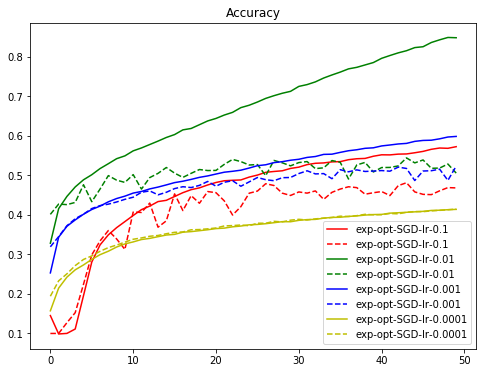

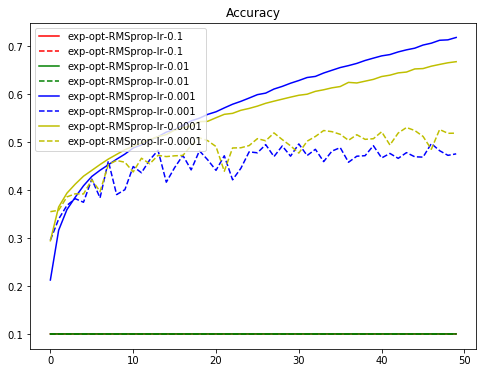

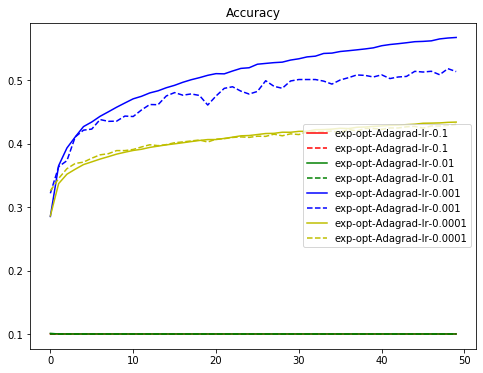

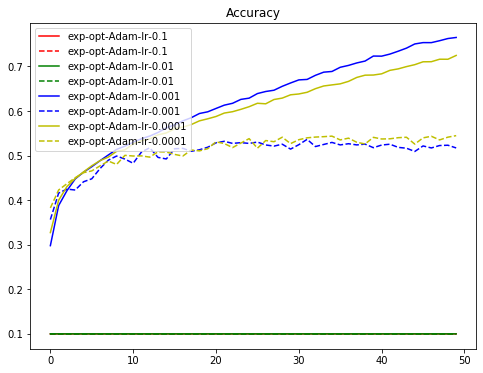

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==0:
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i//4])
plt.title("Loss")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==1:
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i//4])
plt.title("Loss")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==2:
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i//4])
plt.title("Loss")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==3:
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i//4])
plt.title("Loss")
plt.legend()
plt.show()
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==0:
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i//4])
plt.title("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==1:
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i//4])
plt.title("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==2:
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i//4])
plt.title("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i%4==3:
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i//4])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i//4])
plt.title("Accuracy")
plt.legend()
plt.show()